# Imports

In [1]:
import pandas as pd 
import numpy as np

### Base com atributos categóricos

In [2]:
# Base tirada de https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame

# Vitória para quando X for o primeiro

jogo_da_velha = pd.read_csv('databases/tic-tac-toe.csv',
                      header=None, 
                      names=[
                          "top-left",
                          "top-middle",
                          "top-right",
                          "middle-left",
                          "middle-middle",
                          "middle-right",
                          "bottom-left",
                          "bottom-middle", 
                          "bottom-right",
                          "Class"
                      ])

jogo_da_velha

,top-left,top-middle,top-right,middle-left,middle-middle,middle-right,bottom-left,bottom-middle,bottom-right,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [3]:
# jogo_da_velha.describe()

In [4]:
# jogo_da_velha.dtypes

## Pré-Processamento Inicial

In [5]:
atributos_categoricos = [
    "top-left",
    "top-middle",
    "top-right",
    "middle-left",
    "middle-middle",
    "middle-right",
    "bottom-left",
    "bottom-middle", 
    "bottom-right"
    ]

jogo_da_velha = pd.get_dummies(jogo_da_velha, 
                         columns=atributos_categoricos)
jogo_da_velha

,Class,top-left_b,top-left_o,top-left_x,top-middle_b,top-middle_o,top-middle_x,top-right_b,top-right_o,top-right_x,...,middle-right_x,bottom-left_b,bottom-left_o,bottom-left_x,bottom-middle_b,bottom-middle_o,bottom-middle_x,bottom-right_b,bottom-right_o,bottom-right_x
0,positive,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
1,positive,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
2,positive,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
3,positive,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
4,positive,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,negative,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
954,negative,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
955,negative,0,1,0,0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
956,negative,0,1,0,0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [6]:
# from sklearn.preprocessing import OrdinalEncoder
# atributos = [
#                           "top-left",
#                           "top-middle",
#                           "top-right",
#                           "middle-left",
#                           "middle-middle",
#                           "middle-right",
#                           "bottom-left",
#                           "bottom-middle", 
#                           "bottom-right"
#                       ]
# enc = OrdinalEncoder()
# enc.fit(jogo_da_velha[atributos])
# jogo_da_velha[atributos] = enc.transform(jogo_da_velha[atributos])
# jogo_da_velha = jogo_da_velha.replace({"positive": "V", "negative": "F"})
# jogo_da_velha

In [7]:
from sklearn.preprocessing import StandardScaler

# jogo_da_velha[atributos] = StandardScaler().fit_transform(jogo_da_velha[atributos])
# #jogo_da_velha = pd.DataFrame(jogo_da_velha)

# jogo_da_velha


atributos = jogo_da_velha.columns.values.tolist()
# if not reordered:
#     for i in range(2):
#         e = atributos.pop(0)
#         atributos.append(e)
#     atributos

# reordered = True
# jogo_da_velha = jogo_da_velha.reindex(columns=atributos)
# jogo_da_velha


limiar = 1 # O limiar separa o index do que é atributo para o que é a classe
atributos = jogo_da_velha.columns[limiar:] # seleciono apenas os atributos

# Agora é possivel aplicar o StandardScaler apenas nos atributos

jogo_da_velha[atributos] = StandardScaler().fit_transform(jogo_da_velha[atributos])
jogo_da_velha[atributos]

,top-left_b,top-left_o,top-left_x,top-middle_b,top-middle_o,top-middle_x,top-right_b,top-right_o,top-right_x,middle-left_b,...,middle-right_x,bottom-left_b,bottom-left_o,bottom-left_x,bottom-middle_b,bottom-middle_o,bottom-middle_x,bottom-right_b,bottom-right_o,bottom-right_x
0,-0.52177,-0.733294,1.136603,-0.594228,-0.724898,1.238706,-0.52177,-0.733294,1.136603,-0.594228,...,-0.807294,-0.521770,-0.733294,1.136603,-0.594228,1.379504,-0.807294,-0.521770,1.363709,-0.879815
1,-0.52177,-0.733294,1.136603,-0.594228,-0.724898,1.238706,-0.52177,-0.733294,1.136603,-0.594228,...,-0.807294,-0.521770,1.363709,-0.879815,-0.594228,-0.724898,1.238706,-0.521770,1.363709,-0.879815
2,-0.52177,-0.733294,1.136603,-0.594228,-0.724898,1.238706,-0.52177,-0.733294,1.136603,-0.594228,...,-0.807294,-0.521770,1.363709,-0.879815,-0.594228,1.379504,-0.807294,-0.521770,-0.733294,1.136603
3,-0.52177,-0.733294,1.136603,-0.594228,-0.724898,1.238706,-0.52177,-0.733294,1.136603,-0.594228,...,-0.807294,-0.521770,1.363709,-0.879815,1.682855,-0.724898,-0.807294,1.916552,-0.733294,-0.879815
4,-0.52177,-0.733294,1.136603,-0.594228,-0.724898,1.238706,-0.52177,-0.733294,1.136603,-0.594228,...,-0.807294,1.916552,-0.733294,-0.879815,-0.594228,1.379504,-0.807294,1.916552,-0.733294,-0.879815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,-0.52177,1.363709,-0.879815,-0.594228,-0.724898,1.238706,-0.52177,-0.733294,1.136603,-0.594228,...,-0.807294,-0.521770,1.363709,-0.879815,-0.594228,-0.724898,1.238706,-0.521770,-0.733294,1.136603
954,-0.52177,1.363709,-0.879815,-0.594228,-0.724898,1.238706,-0.52177,1.363709,-0.879815,-0.594228,...,-0.807294,-0.521770,-0.733294,1.136603,-0.594228,1.379504,-0.807294,-0.521770,-0.733294,1.136603
955,-0.52177,1.363709,-0.879815,-0.594228,-0.724898,1.238706,-0.52177,1.363709,-0.879815,-0.594228,...,1.238706,-0.521770,-0.733294,1.136603,-0.594228,1.379504,-0.807294,-0.521770,-0.733294,1.136603
956,-0.52177,1.363709,-0.879815,-0.594228,-0.724898,1.238706,-0.52177,1.363709,-0.879815,-0.594228,...,1.238706,-0.521770,-0.733294,1.136603,-0.594228,1.379504,-0.807294,-0.521770,-0.733294,1.136603


## Aprendizagem supervisionada
##### Selecionando o X e y

In [8]:
# Selecionando o X e o y


# X = jogo_da_velha[atributos]
X = jogo_da_velha.iloc[:, limiar:] # Atributos do Data Frame do Pandas
y = jogo_da_velha.iloc[:, :limiar] # Classes do Data Frame do Pandas

y = np.squeeze(y) # Converter em um unico Array quando usar o dataFrame do Pandas

y_unique = np.unique(y)

from sklearn.preprocessing import LabelEncoder # Criando um mapa de cores para mapear o gráfico

lb = LabelEncoder()
lb.fit(y)
mapa_cores = lb.transform(y)

y_unique # Valores unicos de classes

array(['negative', 'positive'], dtype=object)

##### PCA

Projecting 27-dimensional data to 2D


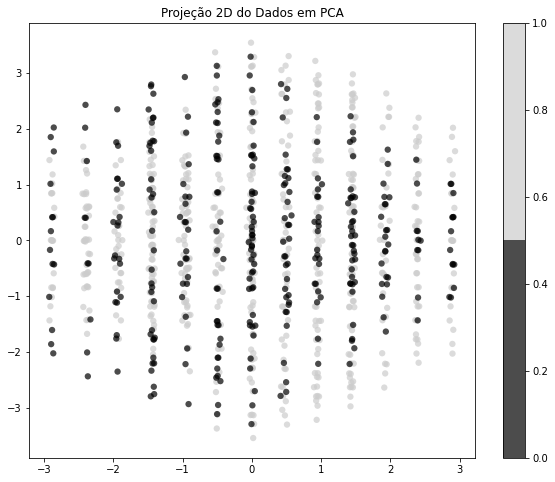

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

def plot_g(pyplot, title, colors, n_classes):
    pyplot.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors, 
             edgecolor='none', alpha=0.7, s=40,
             cmap=plt.cm.get_cmap('nipy_spectral', n_classes)
           )
    pyplot.colorbar()
    pyplot.title(title)

plt.figure(figsize=(10, 8)) # Tamanho da Figura
plot_g(plt, 'Projeção 2D do Dados em PCA', mapa_cores, len(y_unique))
plt.show()


##### Plotando os Gráficos 

In [10]:

# plt.figure(figsize=(10*2, 7))

# plt.subplot(1, 2, 1) # row 1, col 2 index 1
# plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, 
#             edgecolor='none', alpha=0.7, s=40,
#             cmap=plt.cm.get_cmap('nipy_spectral', len(y_unique)))
# plt.colorbar()
# plt.title('Projeção KMeans com X Original')

# plt.subplot(1, 2, 2) # row 1, col 2 index 1
# plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_PCA, 
#             edgecolor='none', alpha=0.7, s=40,
#             cmap=plt.cm.get_cmap('nipy_spectral', len(y_unique)))
# plt.colorbar()
# plt.title('Projeção KMeans com X PCA')

# plt.show()

# Projeto
##### A seguir é feita uma seleção aleátoria dos dados para cada algorítmo com KFold e em seguida o treinamento e avaliação de cada método. A ordem será a estimação dos parâmetros de (kNN, SVM, MLP (Rede Neural), NaiveBayes e Arvore de Decisão), e para cada estimação é selecionada avaliação do melhor parâmetro para cada algorítmo. Para o KNN o melhor numero de visinhos dentre [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], para o SVM o melhor kernel dentre ["linear", "poly", "rbf", "sigmoid"], e por fim para a rede neural a melhor função de ativação ["identity", "logistic", "tanh", "relu"] respectivamente. Por fim analinsando os resultados obitidos pelos scores 

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def get_scores(algoritmo, X_teste, y_teste, name):
    y_pred = algoritmo.predict(X_teste)
    score_p = precision_score(y_teste, y_pred, average='macro')
    score_r = recall_score(y_teste, y_pred, average='macro')
    score_f1 = f1_score(y_teste, y_pred, average='macro')

    return pd.DataFrame(
        [score_p, score_r, score_f1], 
        index = ["Precision", "Recall", "F1"], 
        columns=[name + "_scores"])


### 1. kNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


from sklearn.neighbors import KNeighborsClassifier

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

valores_k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
resultados_knn = []

for k in valores_k:
    resultados_k = []
    knn = KNeighborsClassifier(n_neighbors=k)
    kf = KFold(n_splits=10, shuffle=True)
    for index_train, index_valid in kf.split(X_treino):
        X_train, X_validacao = X_treino.iloc[index_train], X_treino.iloc[index_valid]
        y_train, y_validacao = y_treino.iloc[index_train], y_treino.iloc[index_valid]
        knn.fit(X_train, y_train)
        resultados_k.append(knn.score(X_validacao, y_validacao))
    resultados_knn.append(sum(resultados_k)/len(resultados_k))
# resultados_knn

big_value = np.max(resultados_knn)

mapped_values = dict(zip(valores_k, resultados_knn))

better_knn = 0

for m in mapped_values:
    if mapped_values[m] == big_value:
        better_knn = m
        break

print(dict(zip(["O melhor Knn atual", "Maior valor"], [better_knn, big_value])))

mapped_values

##### O melhor k escolhido é agora usado  na classificação real do Knn

In [ ]:
# Desempenho real do Knn

knn = KNeighborsClassifier(n_neighbors=better_knn)
knn.fit(X_treino, y_treino)
knn_score = knn.score(X_teste, y_teste)
knn_score

##### Avaliação por Precisão, Recall e F1 do kNN

In [ ]:
knn_result = get_scores(knn, X_teste, y_teste, "knn")

### 2. SVM

In [ ]:
from sklearn.svm import SVC
valores_kernel = ["linear", "poly", "rbf", "sigmoid"]
resultados_svm = []

for kernel in valores_kernel:
    resultados_kernel = []
    svc = SVC(kernel=kernel)
    kf = KFold(n_splits=10, shuffle=True)
    for index_train, index_valid in kf.split(X_treino):
        X_train, X_validacao = X_treino.iloc[index_train], X_treino.iloc[index_valid]
        y_train, y_validacao = y_treino.iloc[index_train], y_treino.iloc[index_valid]
        svc.fit(X_train, y_train)
        resultados_kernel.append(svc.score(X_validacao, y_validacao))
    resultados_svm.append(sum(resultados_kernel)/len(resultados_kernel))


big_value = np.max(resultados_svm)

mapped_values = dict(zip(valores_kernel, resultados_svm))

better_k = ""

for m in mapped_values:
    if mapped_values[m] == big_value:
        better_k = m
        break

print(dict(zip(["O melhor Kernel atual", "Maior valor"], [better_k, big_value])))

mapped_values

##### O melhor Kernel escolhido é usado na classificação real do SVM

In [ ]:
svc = SVC(kernel=better_k)
svc.fit(X_treino, y_treino)
svc_score = svc.score(X_teste, y_teste)
svc_score

##### Avaliação por Precisão, Recall e F1 do SVM

In [ ]:
svc_result = get_scores(svc, X_teste, y_teste, "svc")

### 3. MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
valores_ativacao = ["identity", "logistic", "tanh", "relu"]
resultados_mlp = []

for ativacao in valores_ativacao:
    resultados_ativacao = []
    mlp = MLPClassifier(activation=ativacao)
    kf = KFold(n_splits=10, shuffle=True)
    for index_train, index_valid in kf.split(X_treino):
        X_train, X_validacao = X_treino.iloc[index_train], X_treino.iloc[index_valid]
        y_train, y_validacao = y_treino.iloc[index_train], y_treino.iloc[index_valid]
        mlp.fit(X_train, y_train)
        resultados_ativacao.append(svc.score(X_validacao, y_validacao))
    resultados_mlp.append(sum(resultados_ativacao)/len(resultados_ativacao))



big_value = np.max(resultados_mlp)

mapped_values = dict(zip(valores_ativacao, resultados_mlp))

better_a = ""

for m in mapped_values:
    if mapped_values[m] == big_value:
        better_a = m
        break

print(dict(zip(["O melhor parametro de ativação atual", "Maior valor"], [better_a, big_value])))
mapped_values

##### O melhor Valor de ativação escolhido é usado na classificação real do MLP

In [ ]:
mlp = MLPClassifier(activation=better_a)
mlp.fit(X_treino, y_treino)
mlp_score = mlp.score(X_teste, y_teste)
mlp_score

##### Avaliação por Precisão, Recall e F1 do MLP (Rede neural)

In [ ]:
mlp_result = get_scores(mlp, X_teste, y_teste, "mlp")

### 4. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_treino, y_treino)
gnb_score = gnb.score(X_teste, y_teste)

gnb_score

##### Avaliação por Precisão, Recall e F1 do Naive Bayes

In [ ]:
gnb_result = get_scores(gnb, X_teste, y_teste, "gnb")

### 5. Arvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(criterion="entropy")
arvore.fit(X_treino, y_treino)
arvore_score = arvore.score(X_teste, y_teste)
arvore_score

##### Avaliação por Precisão, Recall e F1 da Arvore de Decisão

In [ ]:
arvore_result = get_scores(arvore, X_teste, y_teste, "arvore")

### Salvando resultados em arquivo

In [ ]:
result = knn_result.join(svc_result).join(mlp_result).join(gnb_result).join(arvore_result)
result.to_csv("resultados/abalone.csv", encoding='utf-8', index=True)
pd.read_csv("resultados/abalone.csv", index_col=0)